In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [5]:
raw_data = loadmat('./ex6data1.mat')
data = pd.DataFrame(raw_data.get('X'), columns=['X1', 'X2'])
data['y'] = raw_data.get('y')

In [6]:
data

,X1,X2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


# 1.1 Example Dataset 1

In [7]:
# 数据可视化
def plot_init_data(data, fig, ax):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]

    ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
    ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')

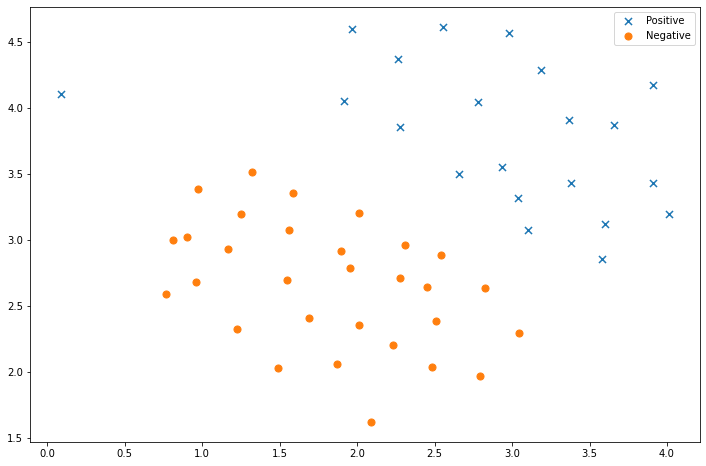

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.legend()
plt.show()

In [9]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [10]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

C:\Users\rb813\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [30]:
# 可视化分类边界
def find_decision_boundary(svc, x1min, x1max, x2min, x2max, diff):
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)

    cordinates = [(x, y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    c_val['cval'] = svc.decision_function(c_val[['x1', 'x2']])

    decision = c_val[np.abs(c_val['cval']) < diff]
    
    return decision.x1, decision.x2

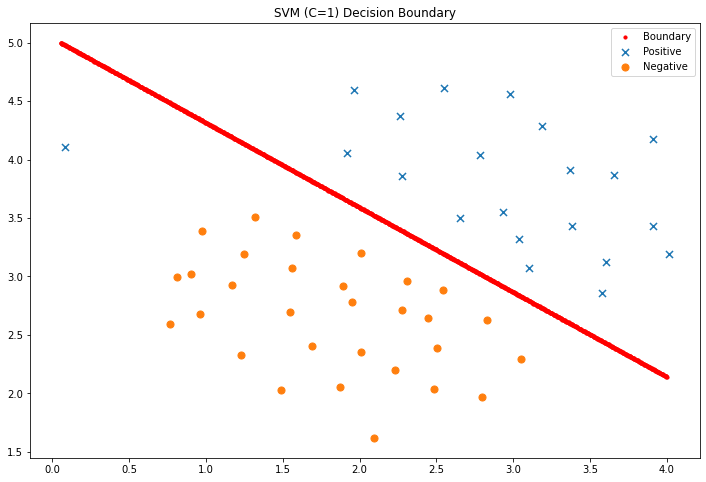

In [32]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=1) Decision Boundary')
ax.legend()
plt.show()

In [37]:
# change C = 100
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)

In [39]:
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

C:\Users\rb813\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

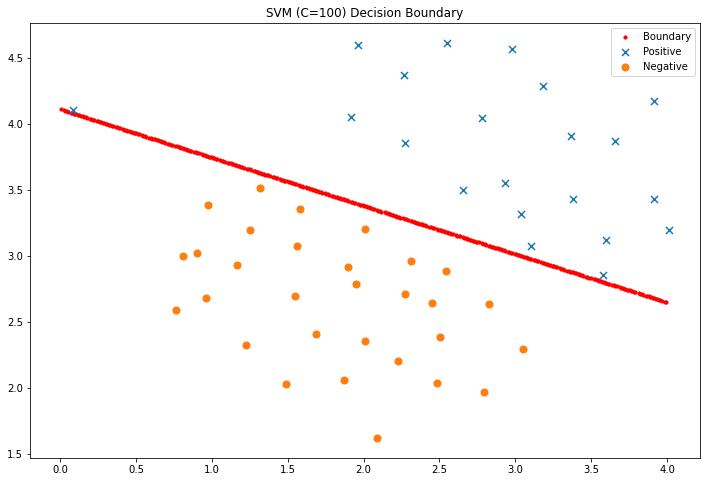

In [41]:
x1, x2 = find_decision_boundary(svc2, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=100) Decision Boundary')
ax.legend()
plt.show()

# 1.2 SVM with Gaussian Kernels

In [42]:
# 你把高斯内核认为是一个衡量一对数据间的“距离”的函数，有一个参数，决定了相似性下降至0有多快
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [43]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [45]:
raw_data2 = loadmat('./ex6data2.mat')

data2 = pd.DataFrame(raw_data2['X'], columns=['X1', 'X2'])
data2['y']=raw_data2['y']

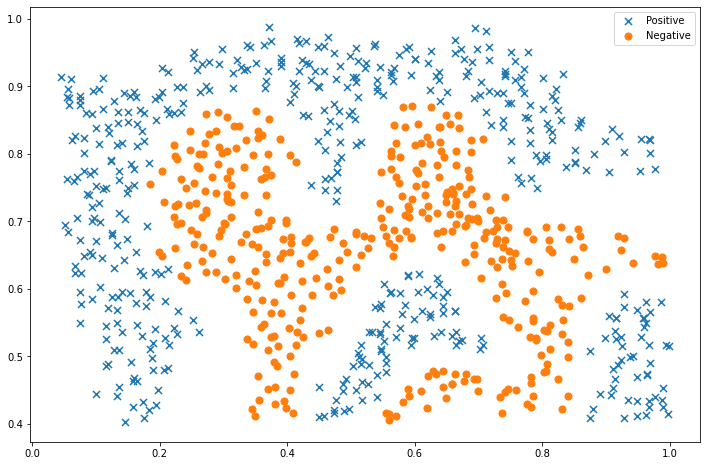

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data2, fig, ax)
ax.legend()
plt.show()

In [62]:
svc = svm.SVC(C=100, gamma=10, probability=True)
# gamma: 核函数系数，只对‘rbf’,‘poly’,‘sigmod’有效。
# 如果gamma为auto，代表其值为样本特征数的倒数，即1/n_features.

svc.fit(data2[['X1', 'X2']], data2['y'])
svc.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

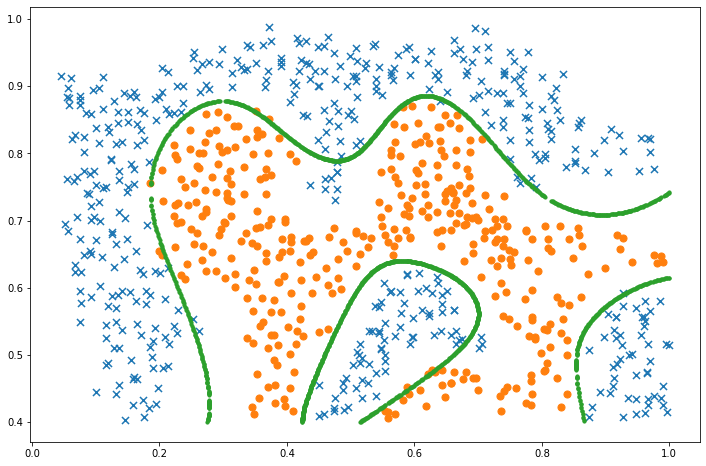

In [63]:
x1, x2 = find_decision_boundary(svc, 0, 1, 0.4, 1, 0.01)
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data2, fig, ax)
ax.scatter(x1, x2, s=10)
plt.show()

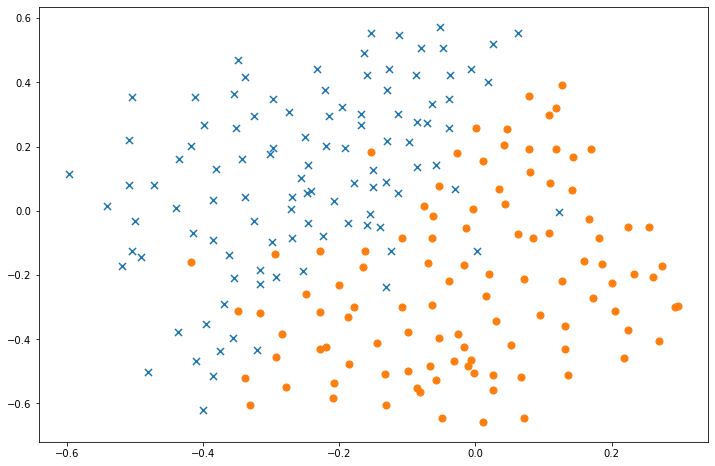

In [75]:
# 对于第三个数据集，我们给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。 
# 我们现在需要寻找最优C和sigma，候选数值为[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
# 各有8个数值的话，一共有8^2 = 64的组合

raw_data3 = loadmat('./ex6data3.mat')

X = raw_data3['X']
Xval = raw_data3['Xval']
y = raw_data3['y'].ravel()
yval = raw_data3['yval'].ravel()

fig, ax = plt.subplots(figsize=(12,8))
data3 = pd.DataFrame(raw_data3.get('X'), columns=['X1', 'X2'])
data3['y'] = raw_data3.get('y')
plot_init_data(data3, fig, ax)
plt.show()

In [76]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

In [77]:
svc = svm.SVC(C=best_params['C'], gamma=best_params['gamma'])
svc.fit(X, y)

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

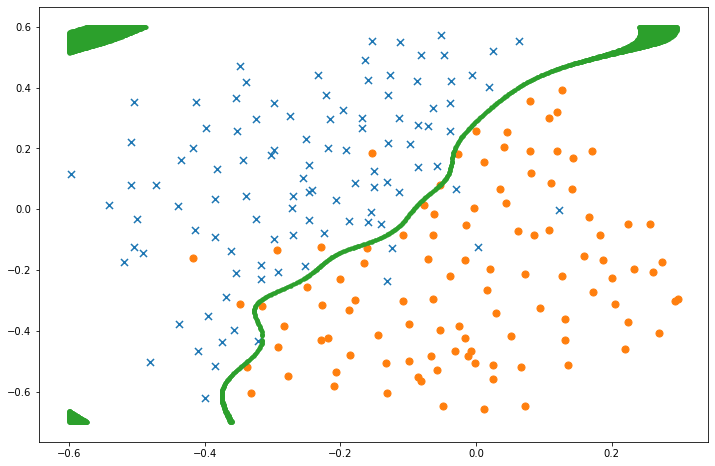

In [78]:
x1, x2 = find_decision_boundary(svc, -0.6, 0.3, -0.7, 0.6, 0.005)
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.scatter(x1, x2, s=10)
plt.show()

# 2 Spam Classication

In [79]:
spam_train = loadmat('./spamTrain.mat')
spam_test = loadmat('./spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [80]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [82]:
svc = svm.SVC()
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Training accuracy = 99.32%
Test accuracy = 98.7%


In [84]:
kw = np.eye(1899)
kw[:3,:]
spam_val = pd.DataFrame({'idx':range(1899)})

In [87]:
spam_val['isspam'] = svc.decision_function(kw)


In [88]:
decision = spam_val[spam_val['isspam'] > -0.55]
decision

,idx,isspam
0,0,-0.093653
1,1,-0.083078
2,2,-0.109401
3,3,-0.119685
4,4,-0.165824
...,...,...
1894,1894,0.101613
1895,1895,-0.016065
1896,1896,-0.151573
1897,1897,-0.109022


In [89]:
path =  './vocab.txt'
voc = pd.read_csv(path, header=None, names=['idx', 'voc'], sep = '\t')
voc.head()

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [90]:
spamvoc = voc.loc[list(decision['idx'])]
spamvoc

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
...,...,...
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero
